In [351]:
import pandas as pd 
def one_feature(df , feature):
    df = df[['created_timestamp',feature]]
    return df

def index_resample(df):
    df = df.set_index(['created_timestamp'])
    df.index = pd.to_datetime(df.index)
    if not df.index.is_monotonic:
                    df = df.sort_index()
    df = df.resample('D').mean().pad()
    return df

def min_(dataframe_collection) :
    les_min = {}
    for i in dataframe_collection:
        les_min[i] = dataframe_collection[i]['created_timestamp'].min()
    return les_min

def max_(dataframe_collection) :
    les_max = {}
    for i in dataframe_collection:
        les_max[i] = dataframe_collection[i]['created_timestamp'].max()
    return les_max

def minimax(dataframe_collection , les_min, les_max):
    min_max = {}

    min_max[0] = les_min[0]
    min_max[1] = les_max[0]

    for i in les_min :
            if les_min[i] <= min_max[0] :
                min_max[0] = les_min[i]
    for i in les_max :
            if les_max[i] >= min_max[1] :
                min_max[1] = les_max[i]
    return min_max
def add_avant(min_max , les_min  , i , feature):
    df3 = pd.DataFrame([[min_max[0] ,0 ] , [les_min[i] ,0 ]] , columns=['created_timestamp' , feature])
    df3 = df3.set_index(['created_timestamp'])
    df3.index = pd.to_datetime(df3.index )

    df3 = df3.resample('D').mean().pad()

    return df3
def add_apres(min_max , les_max  , i , feature):
    df4 = pd.DataFrame([[les_max[i] ,0 ] , [min_max[1] ,0 ]] , columns=['created_timestamp' , feature])
    df4 = df4.set_index(['created_timestamp'])
    df4.index = pd.to_datetime(df4.index )

    df4 = df4.resample('D').mean().pad()

    return df4

def add_all(df , df3 , df4):
    df5 = df3.append(df)
    df6 = df5.append(df4)
    return df6
def drop_duplicated(df , df3,df4 ):
    df = df.drop(df.index[len(df3)])
    df = df.drop(df.index[len(df)- len(df4)])
    return df



def col_(col , feature , names ):
    col[0]= "created_timestamp"

    for i in range(len(list(names.values()))):
        col[i+1] = feature+"_"+names[i]
    return col


def start_fin(startfin ,start , fin , min_max, names) :
    start[0] = min_max[0]
    fin[0] = min_max[1]

    for i in range(len(list(names.values()))):
        start[i+1]= 0
        fin[i+1] = 0
    startfin[0] = start
    startfin[1] = fin
    return startfin

def add_columns(df,dataframe_collection ,feature ,names):
    for i in range (len(dataframe_collection)):   
        for j in range (len(dataframe_collection[0])):   
            df[feature+'_'+names[i]][j] = dataframe_collection[i]['likes'][j]
    return df

In [352]:
df = pd.read_csv('FACEBOOK.csv')
df1 = pd.read_csv('INSTAGRAM.csv')
df2 = pd.read_csv('LINKEDIN.csv')


dataframe_collection ={}
dataframe_collection[0] = df
dataframe_collection[1] = df1
dataframe_collection[2] = df2
feature = 'likes'

les_min = min_(dataframe_collection)
les_max = max_(dataframe_collection)
min_max = minimax(dataframe_collection , les_min , les_max)

#df7 = pd.DataFrame([] , columns = ['created_timestamp' , 'likes'])
#df7= df7.set_index('created_timestamp')
#    ,'likes_0'	,'likes_1',	'likes_2'
#for i in range (len(dataframe_collection[0])):   
  #df7['created_timestamp'][i] = dataframe_collection[0]['likes'][i]

for i in range(len(dataframe_collection)):
    dataframe_collection[i] = one_feature(dataframe_collection[i] , feature)
    dataframe_collection[i] = index_resample(dataframe_collection[i])
    df3 = add_avant(min_max , les_min  , i , feature)
    df4 = add_apres(min_max , les_max  , i , feature)
    dataframe_collection[i] = add_all(dataframe_collection[i] , df3 , df4)
    dataframe_collection[i] =drop_duplicated(dataframe_collection[i] , df3 , df4)



#df7 = df7.append(dataframe_collection[2] , ignore_index=False)

#df7  = one_feature(df7 , feature)
#df7 = index_resample(df7)

#for i in range (len(dataframe_collection)):   
#    df7[feature+'_'+str(i)]= 0
'''    
for i in range (len(dataframe_collection)):   
  for j in range (len(dataframe_collection[0])):   
    df7[feature+'_'+str(i)][j] = dataframe_collection[i]['likes'][j]
'''


C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1258150513.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df3.append(df)
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1258150513.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df5.append(df4)
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1258150513.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df3.append(df)
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1258150513.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df5.append(df4)
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1258150513.py:57: FutureWarning: The frame.append me

"    \nfor i in range (len(dataframe_collection)):   \n  for j in range (len(dataframe_collection[0])):   \n    df7[feature+'_'+str(i)][j] = dataframe_collection[i]['likes'][j]\n"

In [359]:
items = list(dataframe_collection[1].columns)
feature not in items


False

In [353]:
names={}
names[0] = "FACEBOOK" 
names[1] = "INSTAGRAM" 
names[2] = "LINKEDIN"
col={}
col = col_(col,feature,names)
start ={}
fin={}
startfin={}
startfin= start_fin(startfin, start , fin , min_max,names)


df_ = pd.DataFrame([list(startfin[0].values()), list(startfin[1].values())] , columns=list(col.values())  )
df_ = df_.set_index(['created_timestamp'])
df_.index = pd.to_datetime(df_.index )

df_ = df_.resample('D').mean().pad()

df_

,likes_FACEBOOK,likes_INSTAGRAM,likes_LINKEDIN
created_timestamp,,,
2014-01-01 00:00:00+00:00,0.0,0.0,0.0
2014-01-02 00:00:00+00:00,0.0,0.0,0.0
2014-01-03 00:00:00+00:00,0.0,0.0,0.0
2014-01-04 00:00:00+00:00,0.0,0.0,0.0
2014-01-05 00:00:00+00:00,0.0,0.0,0.0
...,...,...,...
2022-08-04 00:00:00+00:00,0.0,0.0,0.0
2022-08-05 00:00:00+00:00,0.0,0.0,0.0
2022-08-06 00:00:00+00:00,0.0,0.0,0.0


In [354]:
df_ = add_columns(df_,dataframe_collection ,feature ,names)
df_

,likes_FACEBOOK,likes_INSTAGRAM,likes_LINKEDIN
created_timestamp,,,
2014-01-01 00:00:00+00:00,100.0,100.0,100.0
2014-01-02 00:00:00+00:00,200.0,100.0,0.0
2014-01-03 00:00:00+00:00,100.0,200.0,100.0
2014-01-04 00:00:00+00:00,0.0,300.0,200.0
2014-01-05 00:00:00+00:00,100.0,200.0,100.0
...,...,...,...
2022-08-04 00:00:00+00:00,2000.0,0.0,0.0
2022-08-05 00:00:00+00:00,2100.0,0.0,0.0
2022-08-06 00:00:00+00:00,2000.0,0.0,0.0


In [339]:


names={}
names[0] = "FACEBOOK" 
names[1] = "INSTAGRAM" 
names[2] = "LINKEDIN"
len(list(names.values()))
col={}
col[0]= "created_timestamp"

for i in range(len(list(names.values()))):
    col[i+1] = feature+"_"+names[i]
list(col.values())

start ={}
fin={}
start[0] = min_max[0]
fin[0] = min_max[1]
for i in range(len(list(names.values()))):
    start[i+1]= 0
    fin[i+1] = 0
list(start.values())

['2014-01-01 00:00:00+00:00', 0, 0, 0]

In [340]:
df2 = pd.DataFrame([list(start.values()), list(fin.values())] , columns=list(col.values())  )
df2 = df2.set_index(['created_timestamp'])
df2.index = pd.to_datetime(df2.index )

df2 = df2.resample('D').mean().pad()

df100= df2
df100

,likes_FACEBOOK,likes_INSTAGRAM,likes_LINKEDIN
created_timestamp,,,
2014-01-01 00:00:00+00:00,0.0,0.0,0.0
2014-01-02 00:00:00+00:00,0.0,0.0,0.0
2014-01-03 00:00:00+00:00,0.0,0.0,0.0
2014-01-04 00:00:00+00:00,0.0,0.0,0.0
2014-01-05 00:00:00+00:00,0.0,0.0,0.0
...,...,...,...
2022-08-04 00:00:00+00:00,0.0,0.0,0.0
2022-08-05 00:00:00+00:00,0.0,0.0,0.0
2022-08-06 00:00:00+00:00,0.0,0.0,0.0


In [341]:
for i in range (len(dataframe_collection)):   
  for j in range (len(dataframe_collection[0])):   
    df100[feature+'_'+names[i]][j] = dataframe_collection[i]['likes'][j]
print(df100)

print(dataframe_collection[0]['likes'])

                           likes_FACEBOOK  likes_INSTAGRAM  likes_LINKEDIN
created_timestamp                                                         
2014-01-01 00:00:00+00:00           100.0            100.0           100.0
2014-01-02 00:00:00+00:00           200.0            100.0             0.0
2014-01-03 00:00:00+00:00           100.0            200.0           100.0
2014-01-04 00:00:00+00:00             0.0            300.0           200.0
2014-01-05 00:00:00+00:00           100.0            200.0           100.0
...                                   ...              ...             ...
2022-08-04 00:00:00+00:00          2000.0              0.0             0.0
2022-08-05 00:00:00+00:00          2100.0              0.0             0.0
2022-08-06 00:00:00+00:00          2000.0              0.0             0.0
2022-08-07 00:00:00+00:00             0.0              0.0             0.0
2022-08-08 00:00:00+00:00             0.0              0.0             0.0

[3142 rows x 3 columns]


In [224]:
dataframe_collection[0]['likes'][20]


0.0

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\3024846357.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df7 = df7.append(dataframe_collection[0] , ignore_index=True)


,likes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1769,0.0
1770,0.0
1771,2.0
1772,2.0


In [232]:

for i in range (len(dataframe_collection[0])):   
  df7['created_timestamp']
for i in range (len(dataframe_collection)):   
    df7[feature+'_'+str(i)]= 0
   
#for i in range (len(dataframe_collection)):         
 #   for j in range(len(df7)):
  #      df7[feature+'_'+str(i)][j] = dataframe_collection[i]['likes'][j]
df_copie


,likes,likes_0,likes_1,likes_2
created_timestamp,,,,
2017-09-29 00:00:00+00:00,0.0,0,0,0
2017-09-30 00:00:00+00:00,0.0,0,0,0
2017-10-01 00:00:00+00:00,0.0,0,0,0
2017-10-02 00:00:00+00:00,0.0,0,0,0
2017-10-03 00:00:00+00:00,0.0,0,0,0
...,...,...,...,...
2022-08-03 00:00:00+00:00,0.0,0,0,0
2022-08-04 00:00:00+00:00,0.0,0,0,0
2022-08-05 00:00:00+00:00,2.0,0,0,0


In [1]:
from cgi import MiniFieldStorage
from decimal import MIN_EMIN
import pandas as pd 
df = pd.read_csv('SOCIAL_MEDIA_REPORTING__FACEBOOK_POSTS_REPORTING.csv')
df1 = pd.read_csv('SOCIAL_MEDIA_REPORTING__INSTAGRAM_POSTS_REPORTING.csv')
df2 = pd.read_csv('SOCIAL_MEDIA_REPORTING__LINKEDIN_POSTS_REPORTING.csv')
df = df[['created_timestamp','likes']]
#df = df.rename(columns={'likes':'likes_FACEbook'})

df1 = df1[['created_timestamp','likes']]
#df1 = df1.rename(columns={'likes':'likes_Instagram'})

df2 = df2[['created_timestamp','likes']]
#df2 = df2.rename(columns={'likes':'likes_Instagram'})

dataframe_collection ={}
dataframe_collection[0] = df
dataframe_collection[1] = df1
dataframe_collection[2] = df2


df = df.set_index(['created_timestamp'])
df.index = pd.to_datetime(df.index)
if not df.index.is_monotonic:
                    df = df.sort_index()
df1 = df1.set_index(['created_timestamp'])
df1.index = pd.to_datetime(df1.index)
if not df1.index.is_monotonic:
                    df1 = df1.sort_index()

df2 = df2.set_index(['created_timestamp'])
df2.index = pd.to_datetime(df2.index)
if not df2.index.is_monotonic:
                    df2 = df2.sort_index()


df = df.resample('D').mean().pad()
df1 = df1.resample('D').mean().pad()
df2 = df2.resample('D').mean().pad()


list(df.min())
list(df1.min())
list(df2.min())

#list(df['created_timestamp'].min() , df['created_timestamp'].min() ,df['created_timestamp'].min())

les_min = {}
les_max = {}
min_max = {}
for i in dataframe_collection:
    les_min[i] = dataframe_collection[i]['created_timestamp'].min()
    les_max[i] = dataframe_collection[i]['created_timestamp'].max()

min_max[0] = les_min[0]
min_max[1] = les_max[0]

for i in les_min :
        if les_min[i] <= min_max[0] :
            min_max[0] = les_min[i]
for i in les_max :
        if les_max[i] >= min_max[1] :
            min_max[1] = les_max[i]
  
min_max               


{0: '2017-09-28 08:26:36+00:00', 1: '2022-08-08 08:42:59+00:00'}

In [127]:
les_min

{0: '2017-09-28 08:26:36+00:00',
 1: '2019-07-12 13:55:05+00:00',
 2: '2022-01-26 15:50:40.835000+00:00'}

In [128]:
les_max

{0: '2022-08-08 08:42:59+00:00',
 1: '2022-07-21 09:00:12+00:00',
 2: '2022-08-05 15:26:14.577000+00:00'}

In [2]:
[list(df.columns)[0]]

['likes']

In [34]:
df

,likes
created_timestamp,
2017-09-28 00:00:00+00:00,0.0
2017-09-29 00:00:00+00:00,0.0
2017-09-30 00:00:00+00:00,0.0
2017-10-01 00:00:00+00:00,0.0
2017-10-02 00:00:00+00:00,0.0
...,...
2022-08-04 00:00:00+00:00,0.0
2022-08-05 00:00:00+00:00,2.0
2022-08-06 00:00:00+00:00,2.0


In [36]:
df3 = pd.DataFrame([[min_max[0] ,0 ] , [les_min[0] ,0 ]] , columns=['created_timestamp' , 'likes'])
df3 = df3.set_index(['created_timestamp'])
df3.index = pd.to_datetime(df3.index )

df3 = df3.resample('D').mean().pad()

df3

,likes
created_timestamp,
2017-09-28 00:00:00+00:00,0.0


In [37]:
df4 = pd.DataFrame([[les_max[0] ,0 ] , [min_max[1] ,0 ]] , columns=['created_timestamp' , 'likes'])
df4 = df4.set_index(['created_timestamp'])
df4.index = pd.to_datetime(df4.index )

df4 = df4.resample('D').mean().pad()

df4

,likes
created_timestamp,
2022-08-08 00:00:00+00:00,0.0


In [40]:
df5 = df3.append(df)
df5

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\2140937724.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df3.append(df)


,likes
created_timestamp,
2017-09-28 00:00:00+00:00,0.0
2017-09-28 00:00:00+00:00,0.0
2017-09-29 00:00:00+00:00,0.0
2017-09-30 00:00:00+00:00,0.0
2017-10-01 00:00:00+00:00,0.0
...,...
2022-08-04 00:00:00+00:00,0.0
2022-08-05 00:00:00+00:00,2.0
2022-08-06 00:00:00+00:00,2.0


In [41]:
df6 = df5.append(df4)
df6

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9704\1838435059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df5.append(df4)


,likes
created_timestamp,
2017-09-28 00:00:00+00:00,0.0
2017-09-28 00:00:00+00:00,0.0
2017-09-29 00:00:00+00:00,0.0
2017-09-30 00:00:00+00:00,0.0
2017-10-01 00:00:00+00:00,0.0
...,...
2022-08-05 00:00:00+00:00,2.0
2022-08-06 00:00:00+00:00,2.0
2022-08-07 00:00:00+00:00,2.0


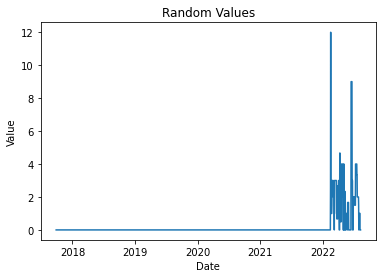

In [28]:
import matplotlib.pyplot as plt

plt.plot(df6['likes'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Random Values')
plt.show()

In [154]:
df6.index[0] == df6.index[1]

False

In [164]:
len(df6.index)

1778

In [27]:
print(df6.drop(df6.index[1772]))

                           likes
created_timestamp               
2017-09-28 00:00:00+00:00    0.0
2017-09-29 00:00:00+00:00    0.0
2017-09-30 00:00:00+00:00    0.0
2017-10-01 00:00:00+00:00    0.0
2017-10-02 00:00:00+00:00    0.0
...                          ...
2022-08-05 00:00:00+00:00    1.0
2022-08-05 00:00:00+00:00    0.0
2022-08-06 00:00:00+00:00    0.0
2022-08-07 00:00:00+00:00    0.0
2022-08-08 00:00:00+00:00    0.0

[1777 rows x 1 columns]


In [8]:
for i in df6.index:
    for j in df6.index:
        if (i == j ):
            df6.drop(i)

print(df6.drop(1773))

,likes
created_timestamp,
2017-09-28 00:00:00+00:00,0.0
2017-09-29 00:00:00+00:00,0.0
2017-09-30 00:00:00+00:00,0.0
2017-10-01 00:00:00+00:00,0.0
2017-10-02 00:00:00+00:00,0.0
...,...
2022-08-05 00:00:00+00:00,1.0
2022-08-05 00:00:00+00:00,0.0
2022-08-06 00:00:00+00:00,0.0


In [33]:



dataframe_collection ={}
dataframe_collection[0] = df
dataframe_collection[1] = df1

def itemsof(dataframe_collection):
    a = ()
    l = list(a)

    for i in (dataframe_collection):
        items = list(dataframe_collection[i].columns)
        for x in items:
            if x not in l :
                l.append(x)

    return tuple(l)
print(itemsof(dataframe_collection))

('Unnamed: 0', 'created_timestamp', 'post_id', 'post_message', 'post_url', 'page_id', 'page_name', 'source_relation', 'platform', 'clicks', 'impressions', 'likes', 'comments')


In [338]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('SOCIAL_MEDIA_REPORTING__FACEBOOK_POSTS_REPORTING.csv')

df = df.set_index(['created_timestamp'])
df.index = pd.to_datetime(df.index)
df = df
if not df.index.is_monotonic:
                    df = df.sort_index()

df1 = df[['page_name', 'platform','impressions' , 'clicks' , 'likes']]
df1
df1 = df1.resample('D').mean().pad()
df1
#df1.to_csv('FB'+'.csv')


,impressions,clicks,likes
created_timestamp,,,
2017-09-28 00:00:00+00:00,0.0,0.0,0.0
2017-09-29 00:00:00+00:00,0.0,0.0,0.0
2017-09-30 00:00:00+00:00,0.0,0.0,0.0
2017-10-01 00:00:00+00:00,0.0,0.0,0.0
2017-10-02 00:00:00+00:00,0.0,0.0,0.0
...,...,...,...
2022-08-04 00:00:00+00:00,7.0,0.0,0.0
2022-08-05 00:00:00+00:00,5.0,1.0,2.0
2022-08-06 00:00:00+00:00,5.0,1.0,2.0


In [287]:
df1.isnull().sum()

comments       0
likes          0
impressions    0
dtype: int64

In [ ]:
2017-09-28
2022-08-08

In [299]:
df2 = pd.DataFrame([["2017-09-28 00:00:00+00:00" ,0 , 0 ,   0] , ["2022-08-08 00:00:00+00:00" ,0 , 0 ,   0]] , columns=['created_timestamp','impressions',	'clicks',	'likes'])
df2 = df2.set_index(['created_timestamp'])
df2.index = pd.to_datetime(df2.index )

df2 = df2.resample('D').mean().pad()

df2

,impressions,clicks,likes
created_timestamp,,,
2017-09-28 00:00:00+00:00,0.0,0.0,0.0
2017-09-29 00:00:00+00:00,0.0,0.0,0.0
2017-09-30 00:00:00+00:00,0.0,0.0,0.0
2017-10-01 00:00:00+00:00,0.0,0.0,0.0
2017-10-02 00:00:00+00:00,0.0,0.0,0.0
...,...,...,...
2022-08-04 00:00:00+00:00,0.0,0.0,0.0
2022-08-05 00:00:00+00:00,0.0,0.0,0.0
2022-08-06 00:00:00+00:00,0.0,0.0,0.0


In [340]:
df1 = df2.append(df1)

df1['likes'] = 0
df1['impressions'] = 0
df1['clicks'] = 0
df1



C:\Users\M Ksar\AppData\Local\Temp\ipykernel_11180\4290607602.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df2.append(df1)


,impressions,clicks,likes
created_timestamp,,,
2014-01-01 00:00:00+00:00,0,0,0
2014-01-02 00:00:00+00:00,0,0,0
2014-01-03 00:00:00+00:00,0,0,0
2014-01-04 00:00:00+00:00,0,0,0
2014-01-05 00:00:00+00:00,0,0,0
...,...,...,...
2022-08-04 00:00:00+00:00,0,0,0
2022-08-05 00:00:00+00:00,0,0,0
2022-08-06 00:00:00+00:00,0,0,0


In [280]:

#ext:csv

In [341]:
def random_walk(
    df, start_value=0, threshold=0.5, 
    step_size=1, min_value=-np.inf, max_value=np.inf
):
    previous_value = start_value
    for index, row in df.iterrows():
        if previous_value < min_value:
            previous_value = min_value
        if previous_value > max_value:
            previous_value = max_value
        probability = random.random()
        if probability >= threshold:
            df.loc[index, 'value'] = previous_value + step_size
        else:
            df.loc[index, 'value'] = previous_value - step_size
        previous_value = df.loc[index, 'value']
    for i in range(len(df)):
        if df['value'][i]<0 : 
            df['value'][i] = df['value'][i] * -1
            
    return df
    
DATE_START = '2014-01-01'
DATE_END = '2022-08-08'
dates = pd.date_range(DATE_START, DATE_END)


In [348]:
df = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(0,1,dates.size)
})
df = random_walk(df,0,0.5,1,0,10000)
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index  ,)
df['value']= df['value']*100
df.rename(columns={"value" : "likes"})

#df.to_csv('FB1'+'.csv')
df

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_11180\1219262672.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'][i] = df['value'][i] * -1


,value
date,
2014-01-01,100.0
2014-01-02,0.0
2014-01-03,100.0
2014-01-04,0.0
2014-01-05,100.0
...,...
2022-08-04,7600.0
2022-08-05,7700.0
2022-08-06,7600.0


In [349]:
for i in range (len(df)):
    df1['impressions'][i] = df['value'][i]
df1

,impressions,clicks,likes
created_timestamp,,,
2014-01-01 00:00:00+00:00,100,100,100
2014-01-02 00:00:00+00:00,0,0,100
2014-01-03 00:00:00+00:00,100,100,200
2014-01-04 00:00:00+00:00,0,100,100
2014-01-05 00:00:00+00:00,100,100,0
...,...,...,...
2022-08-04 00:00:00+00:00,7600,3400,2100
2022-08-05 00:00:00+00:00,7700,3500,2000
2022-08-06 00:00:00+00:00,7600,3600,2100


In [345]:
for i in range (len(df)):
    df1['likes'][i] = df['value'][i]
df1

,impressions,clicks,likes
created_timestamp,,,
2014-01-01 00:00:00+00:00,0,0,100
2014-01-02 00:00:00+00:00,0,0,100
2014-01-03 00:00:00+00:00,0,0,200
2014-01-04 00:00:00+00:00,0,0,100
2014-01-05 00:00:00+00:00,0,0,0
...,...,...,...
2022-08-04 00:00:00+00:00,0,0,2100
2022-08-05 00:00:00+00:00,0,0,2000
2022-08-06 00:00:00+00:00,0,0,2100


In [347]:
for i in range (len(df)):
    df1['clicks'][i] = df['value'][i]
df1

,impressions,clicks,likes
created_timestamp,,,
2014-01-01 00:00:00+00:00,0,100,100
2014-01-02 00:00:00+00:00,0,0,100
2014-01-03 00:00:00+00:00,0,100,200
2014-01-04 00:00:00+00:00,0,100,100
2014-01-05 00:00:00+00:00,0,100,0
...,...,...,...
2022-08-04 00:00:00+00:00,0,3400,2100
2022-08-05 00:00:00+00:00,0,3500,2000
2022-08-06 00:00:00+00:00,0,3600,2100


In [350]:
df1.to_csv('FACEBOOK.csv')

In [ ]:
df2 = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(0,1,dates.size)
})
df2 = random_walk(df,0,0.5,1,0,10000)
#df.set_index('date', inplace=True)
df1['value']= df['value']*100
df1.rename(columns={"value" : "clicks"})


,impressions,clicks,likes,clicks
created_timestamp,,,,
2014-01-01 00:00:00+00:00,0.0,0.0,0.0,NaN
2014-01-02 00:00:00+00:00,0.0,0.0,0.0,NaN
2014-01-03 00:00:00+00:00,0.0,0.0,0.0,NaN
2014-01-04 00:00:00+00:00,0.0,0.0,0.0,NaN
2014-01-05 00:00:00+00:00,0.0,0.0,0.0,NaN
...,...,...,...,...
2022-08-04 00:00:00+00:00,7.0,0.0,0.0,NaN
2022-08-05 00:00:00+00:00,5.0,1.0,2.0,NaN
2022-08-06 00:00:00+00:00,5.0,1.0,2.0,NaN


In [ ]:
df1.shape

(3142, 4)

In [ ]:
df1[]

SyntaxError: invalid syntax (2636850577.py, line 1)

In [ ]:
df1['created_timestamp'] = 0
df1

,page_name,platform,impressions,clicks,likes,created_timestamp
0,Kertys,facebook,2.0,0.0,0.0,0
1,Kertys,facebook,4.0,2.0,0.0,0
2,Kertys,facebook,28.0,0.0,2.0,0
3,Kertys,facebook,43.0,0.0,0.0,0
4,Kertys,facebook,0.0,0.0,0.0,0
...,...,...,...,...,...,...
473,Kertys,facebook,21.0,0.0,1.0,0
474,Kertys,facebook,4.0,0.0,0.0,0
475,Kertys,facebook,187.0,5.0,2.0,0
476,Kertys,facebook,51.0,0.0,1.0,0


In [ ]:
for i in range(len(df1)):
    df1['created_timestamp'][i] = df['date'][i]
df1

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_7184\4238441241.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,page_name,platform,impressions,clicks,likes,created_timestamp
0,Kertys,facebook,2.0,0.0,0.0,2014-01-01 00:00:00
1,Kertys,facebook,4.0,2.0,0.0,2014-01-02 00:00:00
2,Kertys,facebook,28.0,0.0,2.0,2014-01-03 00:00:00
3,Kertys,facebook,43.0,0.0,0.0,2014-01-04 00:00:00
4,Kertys,facebook,0.0,0.0,0.0,2014-01-05 00:00:00
...,...,...,...,...,...,...
473,Kertys,facebook,21.0,0.0,1.0,2015-04-19 00:00:00
474,Kertys,facebook,4.0,0.0,0.0,2015-04-20 00:00:00
475,Kertys,facebook,187.0,5.0,2.0,2015-04-21 00:00:00
476,Kertys,facebook,51.0,0.0,1.0,2015-04-22 00:00:00


In [ ]:
np.random.seed(2019)
N = 3100
rng = pd.date_range('2014-01-01', freq='D', periods=N)
df = pd.DataFrame(np.random.randint(10000, size=(N, 3)), 
                  columns=['impressions' , 'clicks' , 'likes'], 
                  index=rng)
print ((df))

            impressions  clicks  likes
2014-01-01         7240    4286   2072
2014-01-02         8989    7439   2444
2014-01-03          106    1040   1223
2014-01-04         7160    2738   6519
2014-01-05          792    7452   4885
...                 ...     ...    ...
2022-06-23          815    5894   7258
2022-06-24         2805    4854   5938
2022-06-25         9755    2512   8394
2022-06-26         2405    6793   8513
2022-06-27          290    6087   3786

[3100 rows x 3 columns]


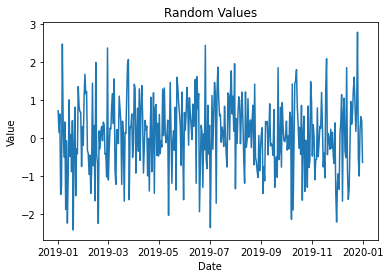

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
DATE_START = '2019-01-01'
DATE_END = '2019-12-31'
dates = pd.date_range(DATE_START, DATE_END)
df = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(0,1,dates.size)
})
df.set_index('date', inplace=True)
plt.plot(df['value'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Random Values')
plt.show()

value    6600.0
dtype: float64
             value
date              
2014-01-01   100.0
2014-01-02     0.0
2014-01-03   100.0
2014-01-04   200.0
2014-01-05   300.0
...            ...
2022-06-26  5900.0
2022-06-27  5800.0
2022-06-28  5700.0
2022-06-29  5800.0
2022-06-30  5700.0

[3103 rows x 1 columns]


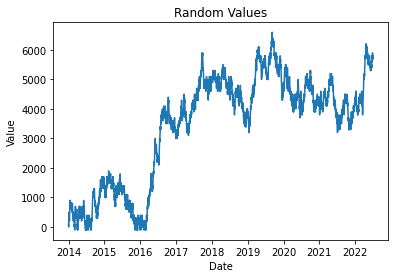

In [ ]:
def random_walk(
    df, start_value=0, threshold=0.5, 
    step_size=1, min_value=-np.inf, max_value=np.inf
):
    previous_value = start_value
    for index, row in df.iterrows():
        if previous_value < min_value:
            previous_value = min_value
        if previous_value > max_value:
            previous_value = max_value
        probability = random.random()
        if probability >= threshold:
            df.loc[index, 'value'] = previous_value + step_size
        else:
            df.loc[index, 'value'] = previous_value - step_size
        previous_value = df.loc[index, 'value']
    return df
DATE_START = '2014-01-01'
DATE_END = '2022-06-30'
dates = pd.date_range(DATE_START, DATE_END)
df = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(0,1,dates.size)
})
df = random_walk(df,0,0.5,1,0,10000)
df.set_index('date', inplace=True)
df = df*100
print(df.max())
print(df)
plt.plot(df['value'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Random Values')
plt.show()

In [ ]:
df['value'][1]

0.0

In [ ]:
def random_walk(
    df, start_value=0, threshold=0.5, 
    step_size=1, min_value=-np.inf, max_value=np.inf
):
    previous_value = start_value
    for index, row in df.iterrows():
        if previous_value < min_value:
            previous_value = min_value
        if previous_value > max_value:
            previous_value = max_value
        probability = random.random()
        if probability >= threshold:
            df.loc[index, 'value'] = previous_value + step_size
        else:
            df.loc[index, 'value'] = previous_value - step_size
        previous_value = df.loc[index, 'value']
    for i in range(len(df)):
        if df['value'][i]<0 : 
            df['value'][i] = df['value'][i] * -1
            
    return df
DATE_START = '2014-01-01'
DATE_END = '2022-06-30'
dates = pd.date_range(DATE_START, DATE_END)
df = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(0,1,dates.size)
})
df = random_walk(df,0,0.5,1,0,10000)
df.set_index('date', inplace=True)
df = df*100
print(df.max())
print(df)
plt.plot(df['value'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Random Values')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3602599649.py, line 27)

In [ ]:
df

,value
date,
2014-01-01,100.0
2014-01-02,100.0
2014-01-03,200.0
2014-01-04,100.0
2014-01-05,200.0
...,...
2022-06-26,2900.0
2022-06-27,2800.0
2022-06-28,2900.0


In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np
def plot_dataset(df, title):
    data = []
    value = go.Scatter(
        x=df.index,
        y=df.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)

df = df.rename(columns={'likes': 'value'})
plot_dataset(df, title='Total')
